<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_82_p_92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**신경망에서의 행렬 곱**

In [10]:
import numpy as np
x=np.array([1,2])
print('x.shape값:',x.shape)

w=np.array([[1,3,5],[2,4,6]])
print('w.shape값:',w.shape)

y=np.dot(x,w)
y

x.shape값: (2,)
w.shape값: (2, 3)


array([ 5, 11, 17])

In [11]:
x=np.array([1.0, 0.5])
w1=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1=np.array([0.1, 0.2, 0.3])

A1=np.dot(x,w1)+b1
print("A1값:",A1)

A1값: [0.3 0.7 1.1]


In [12]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [13]:
z1= sigmoid(A1)
# 은닉층에서의 가중치 합(가중신호와 편향의 총합)을 a로 표기하고, 활성화 함수 h()로 변환된 신호를 z로 표기합니다.
# 활성화 함수로 시그모이드 함수를 사용하기로 합니다.
z1

array([0.57444252, 0.66818777, 0.75026011])

In [14]:
w2=np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2=np.array([0.1, 0.2])

print('z1.shapr값:', z1.shape) # 1 x3
print('w2.shape값:',w2.shape) # 3 x 2
print('b2.shape값:',b2.shape) # 1 x 2

z1.shapr값: (3,)
w2.shape값: (3, 2)
b2.shape값: (2,)


In [16]:
A2=np.dot(z1, w2)+b2
z2=sigmoid(A2)
print('z2 값:', z2)

z2 값: [0.62624937 0.7710107 ]


**2층에서 출력층으로의 신호 전달**

In [17]:
def identity_function(x):
  return x

w3=np.array([[0.1, 0.3], [0.2, 0.4]])
b3=np.array([0.1, 0.2])

a3=np.dot(z2, w3)+b3
y=identity_function(a3)
# identity_function: 항등함수, 이를 출력층의 활성화 함수로 이용.
# 항등 함수: 입력을 그대로 출력하는 함수.

print('y값:',y)

y값: [0.31682708 0.69627909]


In [15]:
# 활성화 함수
# 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정합니다.

# 회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적입니다.

**구현 정리**

In [18]:
def init_network():
  network={}
  network['w1']=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1']=np.array([0.1, 0.2, 0.3])

  network['w2']=np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2']=np.array([0.1, 0.2])

  network['w3']=np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3']=np.array([0.1, 0.2])

  return network
# init_network(): 가중치와 편향을 초기화하고, 이들을 딕셔너리 변수인 network에 저장.
# 딕셔너리 변수 network에는 각 층에 필요한 매개변수(가중치 와 편향)를 저장합니다.

# forward() 함수: 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현.

In [21]:
def forward(netowrk, k):
  w1, w2, w3=network['w1'], network['w2'], network['w3']
  b1, b2, b3=network['b1'], network['b2'], network['b3']

  a1=np.dot(x,w1)+b1
  z1=sigmoid(a1)

  a2=np.dot(z1, w2)+b2
  z2=sigmoid(a2)

  a3=np.dot(z2,w3)+b3
  y=identity_function(a3)
  return y

In [22]:
network=init_network()
x=np.array([1.0, 0.5])
y=forward(network, x)

print('y값:',y)

y값: [0.31682708 0.69627909]


**출력층 설계하기**

In [ ]:
# 기계 학습 문제
# 1) 분류: 데이터가 어떤 클래스에 속하느냐. -> 소프트 맥스 함수
# 2) 회귀: 입력 데이터에 연속적인 수치를 예측하는 문제. -> 항등 함수

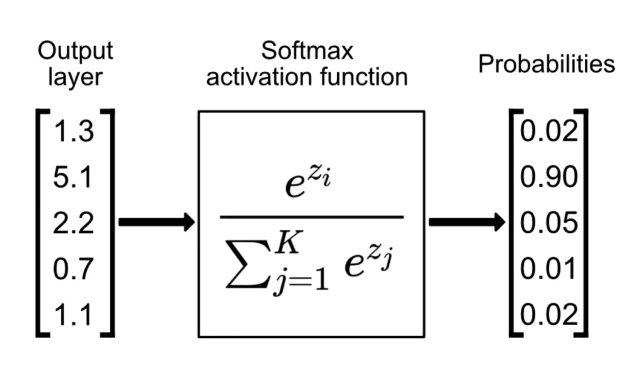

In [24]:
a=np.array([0.3, 2.9, 4.0])
exp_a=np.exp(a)

print('exp_a값:',exp_a)

exp_a값: [ 1.34985881 18.17414537 54.59815003]


In [25]:
sum_exp_a=np.sum(exp_a)
print('sum_exp_a값:',sum_exp_a)

sum_exp_a값: 74.1221542101633


In [26]:
y=exp_a/sum_exp_a
print('y값:',y)

y값: [0.01821127 0.24519181 0.73659691]


In [27]:
def softmax(a):
  exp_a=np.exp(a)
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a

  return y

softmax(a)

array([0.01821127, 0.24519181, 0.73659691])